In [1]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dataset = pd.read_csv("Incomplete payment dataset.csv")
dataset.shape


(273, 5)

In [2]:
features = ['y', 't', 'p', 'Alpha']

X = dataset[features]
y = dataset['MARK']
print(X)
print(y)

       y  t  p  Alpha
0    0.9  0  8      3
1    0.9  0  7      3
2    0.9  0  7      3
3    0.9  2  6      6
4    0.9  3  5      6
..   ... .. ..    ...
268  0.1  2  2      3
269  0.1  0  2      3
270  0.1  1  2      3
271  0.1  0  2      3
272  0.1  0  2      3

[273 rows x 4 columns]
0      25.0
1      26.0
2      26.0
3      28.0
4      28.0
       ... 
268    21.0
269    23.0
270    22.0
271    23.0
272    23.0
Name: MARK, Length: 273, dtype: float64


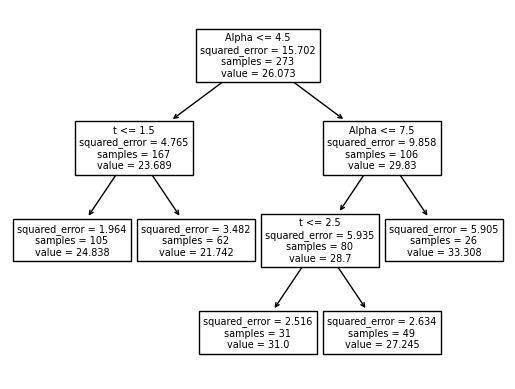

<Figure size 2400x1800 with 0 Axes>

In [3]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_leaf_nodes=5,criterion='squared_error')
regressor.fit(X, y)
tree.plot_tree(regressor,feature_names=features)
from matplotlib.pyplot import figure
# figure(figsize=(8, 6), dpi=300)
plt.rcParams['figure.figsize'] = [40, 20]
figure(figsize=(8, 6), dpi=300)
plt.savefig('hantree.png', dpi=300)

In [4]:
y_pred = regressor.predict(X)
print(y_pred)

[24.83809524 24.83809524 24.83809524 31.         27.24489796 27.24489796
 33.30769231 33.30769231 24.83809524 31.         24.83809524 27.24489796
 24.83809524 24.83809524 33.30769231 33.30769231 33.30769231 33.30769231
 33.30769231 33.30769231 33.30769231 33.30769231 27.24489796 27.24489796
 27.24489796 27.24489796 31.         31.         31.         27.24489796
 27.24489796 27.24489796 31.         31.         27.24489796 31.
 24.83809524 24.83809524 24.83809524 27.24489796 27.24489796 27.24489796
 27.24489796 27.24489796 27.24489796 24.83809524 27.24489796 24.83809524
 33.30769231 33.30769231 33.30769231 33.30769231 33.30769231 33.30769231
 33.30769231 33.30769231 27.24489796 27.24489796 27.24489796 27.24489796
 31.         31.         31.         27.24489796 27.24489796 27.24489796
 31.         31.         31.         31.         24.83809524 24.83809524
 24.83809524 24.83809524 24.83809524 27.24489796 27.24489796 24.83809524
 27.24489796 24.83809524 27.24489796 27.24489796 33.3076923

In [5]:
all_classes=regressor.apply(X, check_input=True)

In [6]:
all_classes

array([5, 5, 5, 7, 8, 8, 4, 4, 5, 7, 5, 8, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4,
       8, 8, 8, 8, 7, 7, 7, 8, 8, 8, 7, 7, 8, 7, 5, 5, 5, 8, 8, 8, 8, 8,
       8, 5, 8, 5, 4, 4, 4, 4, 4, 4, 4, 4, 8, 8, 8, 8, 7, 7, 7, 8, 8, 8,
       7, 7, 7, 7, 5, 5, 5, 5, 5, 8, 8, 5, 8, 5, 8, 8, 4, 4, 4, 4, 4, 4,
       4, 4, 8, 8, 8, 8, 7, 7, 7, 6, 6, 6, 5, 5, 5, 7, 6, 5, 5, 5, 5, 5,
       5, 7, 7, 5, 8, 8, 8, 8, 8, 7, 7, 7, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5,
       5, 5, 5, 7, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 8, 8, 8, 8, 8, 7,
       7, 7, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5,
       5, 5, 5, 5, 5, 8, 8, 8, 8, 8, 7, 7, 7, 6, 6, 6, 6, 6, 5, 5, 5, 6,
       5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5,
       5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6,
       6, 5, 5, 5, 6, 5, 5, 5, 5], dtype=int64)

In [7]:
dict_tmp={}

dict_tmp['4']={}
dict_tmp['5']={}
dict_tmp['6']={}
dict_tmp['7']={}
dict_tmp['8']={}

for i in range(len(all_classes)):
    if all_classes[i] == 4:
        dict_tmp['4'][i]=all_classes[i]
    elif all_classes[i] == 5:
        dict_tmp['5'][i]=all_classes[i]
    elif all_classes[i] == 6:
        dict_tmp['6'][i]=all_classes[i]
    elif all_classes[i] == 7:
        dict_tmp['7'][i]=all_classes[i]
    elif all_classes[i] == 8:
        dict_tmp['8'][i]=all_classes[i]
       

In [8]:

i4 =np.array(list(dict_tmp['4'].keys()))
i5 =np.array(list(dict_tmp['5'].keys()))
i6 =np.array(list(dict_tmp['6'].keys()))
i7 =np.array(list(dict_tmp['7'].keys()))
i8 =np.array(list(dict_tmp['8'].keys()))


In [9]:
for i in [i4, i5, i6, i7, i8]:
    mean_X = np.mean(X.iloc[i])
    mean_y = np.mean(y.iloc[i])
    
    print(f"Mean of X.iloc[{i}]: {mean_X}")
    print(f"Mean of y.iloc[{i}]: {mean_y}")
    print("-----")

Mean of X.iloc[[ 6  7 14 15 16 17 18 19 20 21 48 49 50 51 52 53 54 55 82 83 84 85 86 87
 88 89]]: y        0.807692
t        3.653846
p        1.115385
Alpha    9.000000
dtype: float64
Mean of y.iloc[[ 6  7 14 15 16 17 18 19 20 21 48 49 50 51 52 53 54 55 82 83 84 85 86 87
 88 89]]: 33.30769230769231
-----
Mean of X.iloc[[  0   1   2   8  10  12  13  36  37  38  45  47  70  71  72  73  74  77
  79 100 101 102 105 106 107 108 109 110 113 127 128 131 132 133 134 138
 139 140 141 142 144 145 146 147 161 162 165 166 167 168 169 173 174 175
 176 177 178 179 180 194 195 196 198 199 200 201 205 206 207 208 209 210
 211 212 219 220 226 227 228 230 231 232 233 237 238 239 240 241 242 243
 244 251 252 253 255 256 257 258 265 266 267 269 270 271 272]]: y        0.456190
t        0.209524
p        3.514286
Alpha    3.000000
dtype: float64
Mean of y.iloc[[  0   1   2   8  10  12  13  36  37  38  45  47  70  71  72  73  74  77
  79 100 101 102 105 106 107 108 109 110 113 127 128 131 132 133 134 138
 

D:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
